In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

위 코드는 한글을 실행하는 코디이다. 실행하고 재시작 및 모두 실행으로 다시 코드를 입력하면 코드가 돌아간다

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DRIVE_PATH = "/content/drive/MyDrive/"

FILE_PATH_IN_MY_DRIVE = "part1_user_analysis/project_1_data_analysis/data/event_log.csv"
PATH = DRIVE_PATH + FILE_PATH_IN_MY_DRIVE

df = pd.read_csv(PATH)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


### 기본적인 데이터 살펴보기

In [5]:
len(df)

885129

In [6]:
df.info

<bound method DataFrame.info of                      event_time event_type  product_id          category_id  \
0       2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1       2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2       2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3       2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4       2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   
...                         ...        ...         ...                  ...   
885124  2021-02-28 23:55:01 UTC       view      953226  2144415927553229037   
885125  2021-02-28 23:58:05 UTC       view     1715907  2144415927049912542   
885126  2021-02-28 23:58:09 UTC       view     4170534  2144415939364389423   
885127  2021-02-28 23:58:14 UTC       view      888273  2144415921932861531   
885128  2021-02-28 23:59:09 UTC       view      743182  2144415935631458761   

                   

숫자형 컬럼의 중앙값과 평균 살펴보기

In [7]:
df[['price']].describe

<bound method NDFrame.describe of          price
0        31.90
1        17.16
2         9.81
3       113.81
4        15.87
...        ...
885124  219.94
885125   80.03
885126   64.92
885127   10.16
885128   65.08

[885129 rows x 1 columns]>

In [8]:
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


event_time     2020-09-24 11:57:06 UTC
event_type                        cart
product_id                         102
category_id        2144415921001726020
price                             0.22
user_id            1515915625353226922
dtype: object

In [9]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


event_time     2021-02-28 23:59:09 UTC
event_type                        view
product_id                     4183880
category_id        2227847332769039290
price                         64771.06
user_id            1515915625611024030
dtype: object

# Daily Active User (기간: Daily)
* active user의 기준: 아래 중 1가지의 행동을 한 유저(user_id)
  * view(상품보기)
  * cart(장바구니 담기)
  * remove_from_cart(장바구니에서 제거하기)
  * purchase(구매하기)

In [10]:
# 날짜 전처리
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format = "%Y-%m-%d")

# 임의로 10월 1월 부터 2월 28일간 데이터로 끊는다
df = df.loc[(df['event_date'] > '2020-09-30')]

In [11]:
# 날짜 별 unique user 수 계산하기
df_2 = df.groupby('event_date')['user_id'].nunique()

In [12]:
dau_data = pd.DataFrame({'event_date':df_2.index, 'user_count':df_2.values})

In [13]:
dau_data.describe()

,user_count
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


In [14]:
% matplotlib inline

Text(0, 0.5, '유저수')

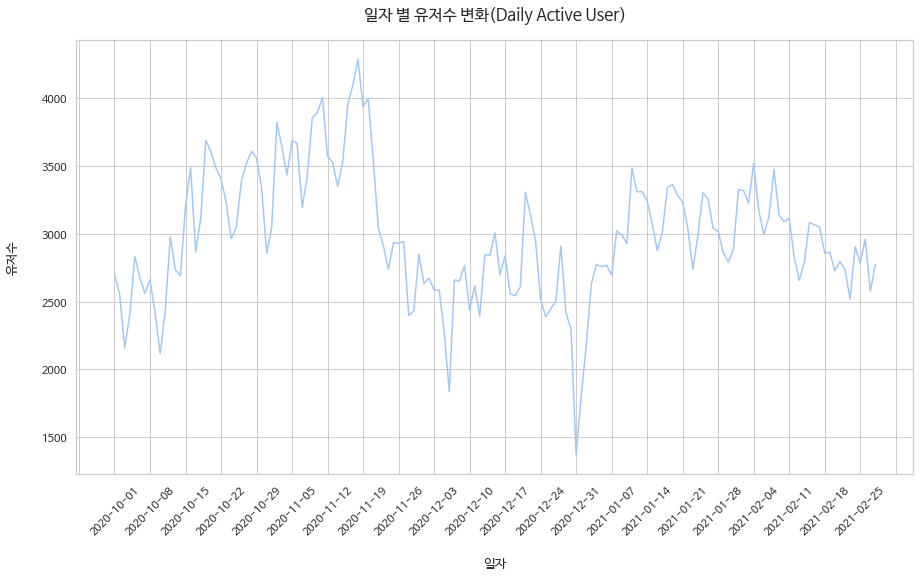

In [15]:
sns.set_theme(style="whitegrid", palette="pastel") #테마를 설정한다
plt.rc('font',family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X라벨의 글씨를 회전한다

g = sns.lineplot(x='event_date', y='user_count', data=dau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15,8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정한다
g.set_title("일자 별 유저수 변화(Daily Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정한다

g.set_xlabel("일자", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다
g.set_ylabel("유저수", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다

# Weekly Acrive User (기간: Weekly)

In [16]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)

# 날짜를 datatime format으로 변경한다
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format="%Y-%m-%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
# 날짜의 포멧을 %Y-w%U 연도 -w주차 형태로 변경
df['year_week_number'] = df.event_date_dtm_format.dt.strftime('%Y-w%U')
df['year_week_number']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


28074     2020-w39
28075     2020-w39
28076     2020-w39
28077     2020-w39
28078     2020-w39
            ...   
885124    2021-w09
885125    2021-w09
885126    2021-w09
885127    2021-w09
885128    2021-w09
Name: year_week_number, Length: 857055, dtype: object

In [18]:
# 주별 unique user 수 계산하기
df_2 = df.groupby('year_week_number')['user_id'].nunique()
wau_data = pd.DataFrame({'year_week_number':df_2.index, 'user_count':df_2.values})

In [19]:
df_2.head()

year_week_number
2020-w39     7141
2020-w40    16633
2020-w41    19305
2020-w42    22179
2020-w43    21956
Name: user_id, dtype: int64

In [20]:
wau_data = pd.DataFrame({'year_week_number':df_2.index, 'user_count':df_2.values})

In [21]:
# 5개월 (2020-10-01 - 2021-02-28) WAU 평균 17463명이 방문한다
wau_data.describe()

,user_count
count,24.000000
mean,17555.083333
std,5837.987920
min,2775.000000
25%,16738.000000
50%,18778.500000
75%,20581.750000
max,25600.000000


Text(0, 0.5, '유저수')

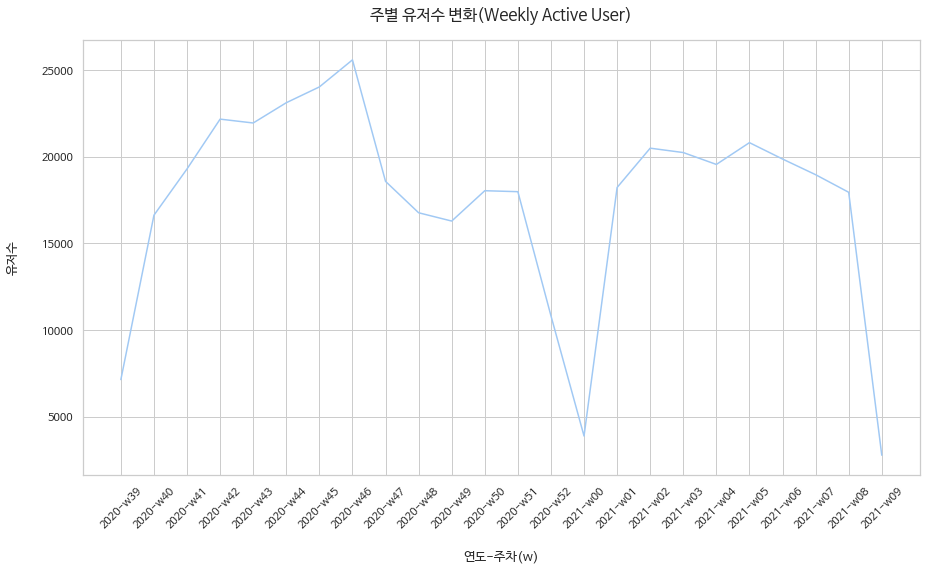

In [22]:
sns.set_theme(style="whitegrid", palette="pastel") #테마를 설정한다
plt.rc('font',family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X라벨의 글씨를 회전한다

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15,8) # 그래프의 크기를 키운다
g.set_title("주별 유저수 변화(Weekly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정한다

g.set_xlabel("연도-주차(w)", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다
g.set_ylabel("유저수", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다

2020-w52, 2021-w00이 이상할 정도로 낮다

In [23]:
# 주별 날짜를 구해본다
# 2020-w52, 2021-w00 가 각각 다른 그룹으로 할당된 것을 볼 수 있다.
# 합쳐주는 작업을 한다
df_3 = df.groupby('year_week_number')['event_date'].nunique()
df_3.head()

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
Name: event_date, dtype: int64

In [24]:
# 2021-w00을 2020-w52로 바꾼다
# 앞의 3일, 뒤의 1일도 제거한다(정확히 주차별 유저수만 계산하기 위해서)
OLD_YEAR_WEEK_NUMBER = "2021-w00"
NEW_YEAR_WEEK_NUMBER = "2020-w52"
df.loc[df.year_week_number == OLD_YEAR_WEEK_NUMBER, ["year_week_number"]] = NEW_YEAR_WEEK_NUMBER

df_without_week_number_count_under_7 = (
    df.loc[(df["year_week_number"] != '2020-w38'), :]
)

df_without_week_number_count_under_7 = (
    df_without_week_number_count_under_7.loc[(df_without_week_number_count_under_7["year_week_number"] != '2021-w09'), :]
)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [25]:
df_group_by_week_number = (
    df_without_week_number_count_under_7
    .groupby('year_week_number')['user_id']
    .nunique()
)
wau_data = pd.DataFrame({'year_week_number':df_group_by_week_number.index, 'user_count':df_group_by_week_number.values})

In [26]:
# 아까는 5개월 (2020-10-01 - 2021-02-28) WAU 평균 17463명이 방문

# 지금은 19451으로 평균이 늘어났다(7일 이하인 주차는 제거했기 때문)

wau_data.describe()

,user_count
count,22.000000
mean,19014.636364
std,3753.157560
min,7141.000000
25%,17963.750000
50%,19138.000000
75%,20741.250000
max,25600.000000


(0.0, 28000.0)

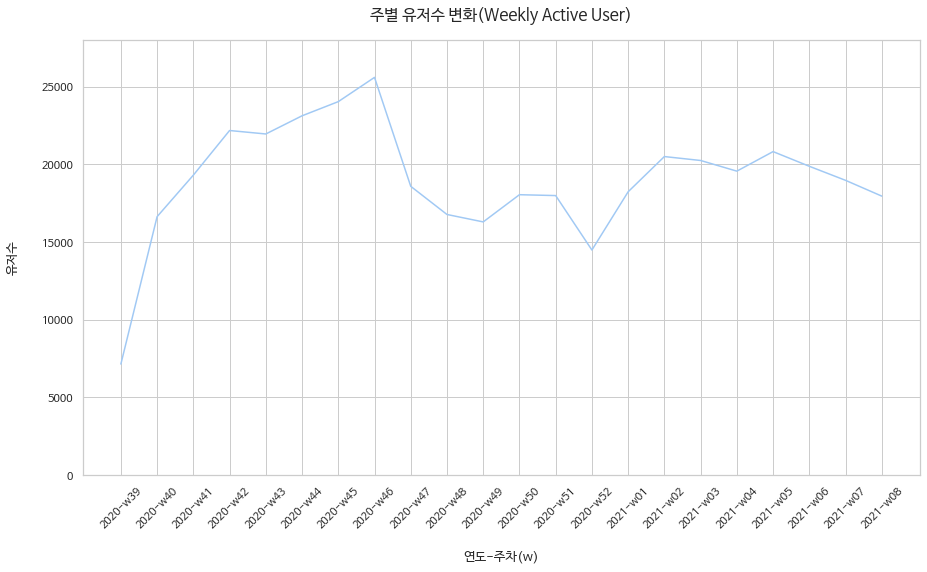

In [27]:
sns.set_theme(style="whitegrid", palette="pastel") #테마를 설정한다
plt.rc('font',family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X라벨의 글씨를 회전한다

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15,8) # 그래프의 크기를 키운다
g.set_title("주별 유저수 변화(Weekly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정한다

g.set_xlabel("연도-주차(w)", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다
g.set_ylabel("유저수", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다

# 추가 y축 기준을 정해줌(~lim: 축의 한계를 정해줌)
g.set_ylim(0,28000)

# Monthly Active User(기간: Monthly)

In [28]:
df = df.loc[(df['event_date'] > '2020-09-30')]

# 날짜 뽑기 (연도-월)
df['event_month'] = df['event_time'].str.slice(start=0, stop=7)

# 날짜 별 unique user 수 계산하기
df_2 = df.groupby('event_month')['user_id'].nunique()
# nunique: 고유값들의 수
# unique: 고유값들 항목

# Series를 Dataframe 으로 변환하기
mau_data = pd.DataFrame({'event_month':df_2.index, 'user_count':df_2.values})

In [29]:
# 80963
mau_data.describe()

,user_count
count,5.000000
mean,80963.000000
std,8130.149937
min,72137.000000
25%,74606.000000
50%,81256.000000
75%,84216.000000
max,92600.000000


Text(0, 0.5, '유저수')

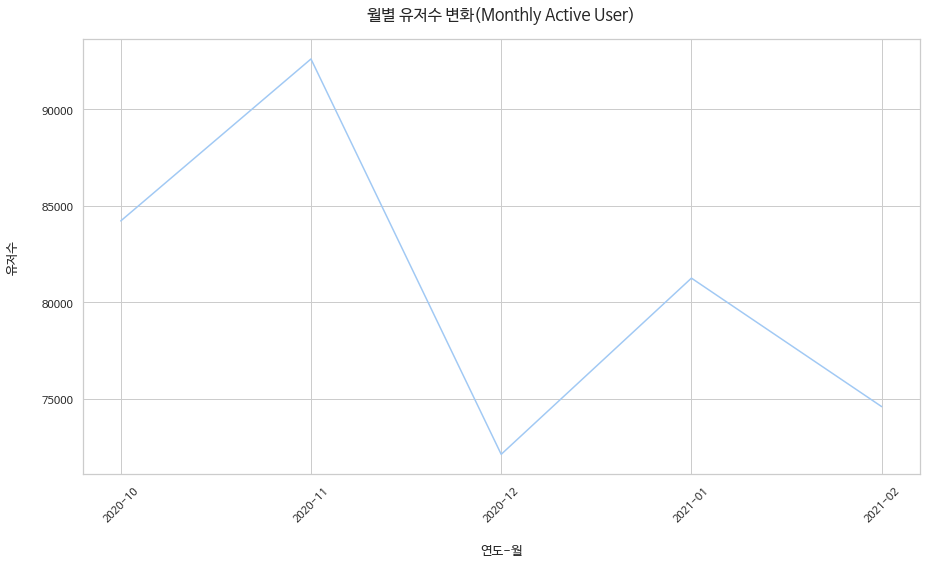

In [30]:
sns.set_theme(style="whitegrid", palette="pastel") #테마를 설정한다
plt.rc('font',family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X라벨의 글씨를 회전한다

g = sns.lineplot(x='event_month', y='user_count', data=mau_data) # line 차트 그래프를 그린다
g.figure.set_size_inches(15,8) # 그래프의 크기를 키운다
g.set_title("월별 유저수 변화(Monthly Active User)", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정한다

g.set_xlabel("연도-월", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다
g.set_ylabel("유저수", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다

# 아무래도 daily가 줄어들었기 때문에, monthly 또한 2021년에 갈수록 줄어드는 추세이다. (10, 11월 peak)
# 하지만 전체 데이터를 보지 않았기 때문에 seasonal effect 인지, 유저수가 감소한 것인지 완전히 단정할 수 없다
# 전자제품 쇼핑몰의 특성도 존재할 것이다

# DAU/MAU

한 유저가 1달에 얼마나 자주 들어오는 서비스인지 판단할 수 있는 지표

In [31]:
dau_data.user_count.mean()

2984.8543046357618

In [32]:
mau_data.user_count.mean()

80963.0

In [33]:
avg_daily_user = dau_data.user_count.mean()
avg_month_user = mau_data.user_count.mean()

dau_mau_ratio = avg_daily_user/avg_month_user
print(dau_mau_ratio)

0.03686689357651966


# 지표 2. 유저수와 세션수

In [34]:
# 원래는 세션을 따로 정의하고 만들어야 하지만, 해당 데이터셋은 이미 만들어져 있다
# 보통 각 페이지 뷰 간 30분 이상 차이날 때  세션으로 간주한다
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


일별 세션수 구하기

In [35]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format="%Y-%m-%d")

In [36]:
# 날짜 별 unique user 수 계산하기
df_unique_user_and_session = (
    df.loc[:,['user_id', 'user_session','event_time','event_date']]
    .groupby('event_date')
    .agg(['nunique', 'count'])
)

In [37]:
df_unique_user_and_session.sort_values('event_date').head(5)

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982

In [38]:
# ('user_id','nunique'): 유저 수
# ('user_session', 'nunique') : 세션 수
# ('event_time', 'count') : 이벤트 수 (클릭수)
df_unique_user_and_session.sort_values('event_date').columns

MultiIndex([(     'user_id', 'nunique'),
            (     'user_id',   'count'),
            ('user_session', 'nunique'),
            ('user_session',   'count'),
            (  'event_time', 'nunique'),
            (  'event_time',   'count')],
           )

In [39]:
# 일별 유저수, 세션수, 이벤트 수 차이
agg = df_unique_user_and_session.sort_values('event_date')
user_session_agg_df = pd.DataFrame(
    {
        'user_count': agg[('user_id','nunique')],
        'session_count':agg[('user_session','nunique')],
        'event_count':agg[('event_time','count')]
    }
)
user_session_agg_df.head()

,user_count,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982


In [40]:
# 유저 별 일일 세션수
user_session_agg_df['session_per_user'] = user_session_agg_df['session_count']/user_session_agg_df['user_count']

# 세션 별 이벤트 클릭 수
user_session_agg_df['clicks_per_session'] = user_session_agg_df['event_count']/user_session_agg_df['session_count']

In [41]:
user_session_agg_df.head()

,user_count,session_count,event_count,session_per_user,clicks_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560


In [42]:
# 세션 및 클릭 그려보기. 2개를 어떻게 하나의 차트에 그리지?
# sns.lineplot(x='event_date', y=['session_per_user', 'clicks_per_session'], data=user_session_agg_df) # line 차트 그래프를 그린다

In [43]:
# Wide to Long Format
melted_df = pd.melt(
    user_session_agg_df.reset_index(),
    id_vars=['event_date'],
    value_vars=['session_per_user', 'clicks_per_session']
)
melted_df.head()

,event_date,variable,value
0,2020-10-01,session_per_user,1.054835
1,2020-10-02,session_per_user,1.066041
2,2020-10-03,session_per_user,1.050416
3,2020-10-04,session_per_user,1.054629
4,2020-10-05,session_per_user,1.060028


Text(0, 0.5, 'variable')

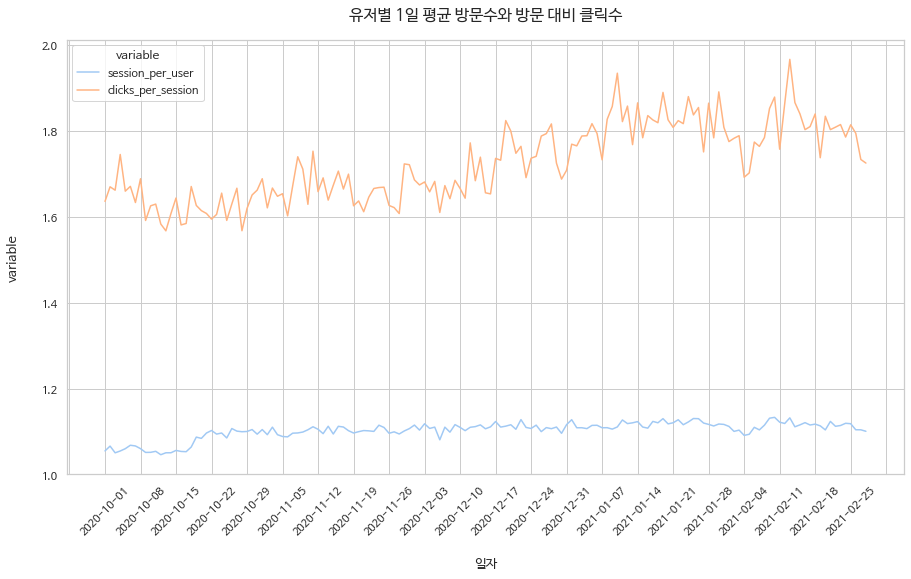

In [44]:
sns.set_theme(style="whitegrid", palette="pastel") #테마를 설정한다
plt.rc('font',family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X라벨의 글씨를 회전한다

g = sns.lineplot(x='event_date', y='value', hue='variable', data=melted_df) # line 차트 그래프를 그린다
g.figure.set_size_inches(15,8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정한다
g.set_title("유저별 1일 평균 방문수와 방문 대비 클릭수", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정한다

g.set_xlabel("일자", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다
g.set_ylabel("variable", labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다

# 지표 3. 코호트 분석

In [45]:
import pandas as pd

In [46]:
len(df)

857055

In [47]:
# '0' (Python) objects
# 문자열을 의미합니다
df.event_time.dtypes

dtype('O')

In [48]:
# event time type을 string에서 datetime으로 바꾸기
# 날짜 관련 유용한 함수들을 쓰기 위함
df['event_time'] = pd.to_datetime(df['event_time'], format="%Y-%m-%d %H:%M:%S %Z")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


In [49]:
# data type을 확인해보면 아래와 같다
df.event_time.dtypes

datetime64[ns, UTC]

In [50]:
# 구매 연도-월 형태의 필드를 생성
# strftime: 날짜와 시간의 정보를 문자열로 바꿔주는 함수
df['order_month'] = df['event_time'].dt.strftime('%Y-%m')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [51]:
# event_type이 구매인 경우만 필터링한다
order_data = df.loc[df.event_type == "purchase"]
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
28089,2020-10-01 00:16:49+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28094,2020-10-01 00:21:18+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28104,2020-10-01 00:31:26+00:00,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28117,2020-10-01 00:39:19+00:00,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28118,2020-10-01 00:39:19+00:00,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [52]:
# index를 user_id로 설정합니다
# 나중에 join을 index를 기준으로 할 예정입니다.
order_data.set_index('user_id',inplace=True)
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
user_id,,,,,,,,,,,,,
1515915625521279407,2020-10-01 00:16:49+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521279407,2020-10-01 00:21:18+00:00,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521280982,2020-10-01 00:31:26+00:00,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19+00:00,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19+00:00,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [53]:
# 연도 - 월 형태의 필드를 생성합니다
df['year_month'] = df['event_time'].dt.strftime('%Y-%m')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,year_month
28074,2020-10-01 00:01:36+00:00,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28075,2020-10-01 00:04:11+00:00,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28076,2020-10-01 00:07:23+00:00,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28077,2020-10-01 00:07:56+00:00,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10
28078,2020-10-01 00:08:11+00:00,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10,2020-10


In [54]:
# 유저별 철번째 구매월을 추출
# group by: user_id 별로 order_month가 제일 작은 경우
first_order = order_data.groupby(order_data.index)['order_month'].min()
first_order.head()

user_id
1515915625353286099    2020-10
1515915625353534622    2020-10
1515915625353561691    2020-11
1515915625353900095    2020-10
1515915625354561351    2020-10
Name: order_month, dtype: object

In [55]:
# 기존 order_data에 첫번째 구매월에 대한 정보를 추가
order_data = order_data.merge(
    first_order.rename("first_order_month").to_frame(),
    left_index = True,
    right_index = True
)
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,first_order_month
user_id,,,,,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44+00:00,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:01:55+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353561691,2020-11-24 17:37:22+00:00,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [56]:
# index를 다시 해제
# inplace = True는 기존 데이터에 변화를 반영하겠다는 의미
order_data.reset_index(inplace=True)
order_data.head()

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,first_order_month
0,1515915625353286099,2020-10-03 11:23:44+00:00,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1,1515915625353534622,2020-10-06 10:01:55+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
2,1515915625353534622,2020-10-06 10:03:42+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
3,1515915625353534622,2020-10-06 10:29:25+00:00,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
4,1515915625353561691,2020-11-24 17:37:22+00:00,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [57]:
grouped = order_data.groupby(['first_order_month', 'order_month'])

In [58]:
# 첫 구매월 별로 다음 달의 구매건수 변화
cohorts = grouped['user_id'].nunique()
cohorts.head(50)

first_order_month  order_month
2020-10            2020-10        3796
                   2020-11          67
                   2020-12          17
                   2021-01           4
                   2021-02           4
2020-11            2020-11        4261
                   2020-12          68
                   2021-01          26
                   2021-02           7
2020-12            2020-12        3784
                   2021-01          68
                   2021-02          21
2021-01            2021-01        4673
                   2021-02         117
2021-02            2021-02        4192
Name: user_id, dtype: int64

In [59]:
cohorts = cohorts.reset_index()
cohorts.head()

,first_order_month,order_month,user_id
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [60]:
# 필드 user_id의 이름을 total_user로 변경
cohorts.rename({'user_id':'total_users'}, axis=1, inplace=True)
cohorts.head()

,first_order_month,order_month,total_users
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [61]:
# 각 첫 구매월 별로 구매월이 잘 분포되어 있는지 확인
each_period = cohorts['first_order_month'].value_counts().sort_index()
each_period

2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_order_month, dtype: int64

In [62]:
cohorts.first_order_month.dtypes

# ('O'): 데이터 타입이 object

dtype('O')

In [63]:
# 코호트 분석을 위해 첫 구매월과 구매월의 차이를 계산
# 기존 함수를 이용하기 위해 string을 datetime으로 바꾸고 to_period 함수를 사용

cohorts["first_order_month_dt"] = pd.to_datetime(cohorts.first_order_month, format="%Y-%m")
cohorts["order_month_dt"] = pd.to_datetime(cohorts.order_month, format="%Y-%m")

In [64]:
cohorts.first_order_month_dt.dtypes

# datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype

dtype('<M8[ns]')

In [65]:
# period 객체로 바꿉니다
# https://pandas.pydata.org/docs/reference/api/pandas.Period.html
cohorts.order_month_dt.dt.to_period('M')

0     2020-10
1     2020-11
2     2020-12
3     2021-01
4     2021-02
5     2020-11
6     2020-12
7     2021-01
8     2021-02
9     2020-12
10    2021-01
11    2021-02
12    2021-01
13    2021-02
14    2021-02
Name: order_month_dt, dtype: period[M]

In [66]:
# integer로 변경
# astype(int): 문자열을 숫자형으로 바꾸는 함수
cohorts.order_month_dt.dt.to_period('M').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0     609
1     610
2     611
3     612
4     613
5     610
6     611
7     612
8     613
9     611
10    612
11    613
12    612
13    613
14    613
Name: order_month_dt, dtype: int64

In [67]:
cohorts['month_diff'] = (
    cohorts.order_month_dt.dt.to_period('M').astype(int)
    - cohorts.first_order_month_dt.dt.to_period('M').astype(int)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
cohorts.head()

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt,month_diff
0,2020-10,2020-10,3796,2020-10-01,2020-10-01,0
1,2020-10,2020-11,67,2020-10-01,2020-11-01,1
2,2020-10,2020-12,17,2020-10-01,2020-12-01,2
3,2020-10,2021-01,4,2020-10-01,2021-01-01,3
4,2020-10,2021-02,4,2020-10-01,2021-02-01,4


In [69]:
cohorts = cohorts[['first_order_month', 'month_diff','total_users']]
cohorts.set_index(['first_order_month','month_diff'],inplace=True)
cohorts.head()

total_users
first_order_month month_diff             
2020-10           0                  3796
                  1                    67
                  2                    17
                  3                     4
                  4                     4

In [70]:
cohorts = cohorts['total_users'].unstack(1)
cohorts

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,3796.0,67.0,17.0,4.0,4.0
2020-11,4261.0,68.0,26.0,7.0,NaN
2020-12,3784.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


In [71]:
# 재구매율로 표현하기
reorder_rate = cohorts.divide(cohorts[0],axis=0)
reorder_rate

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,1.0,0.017650,0.004478,0.001054,0.001054
2020-11,1.0,0.015959,0.006102,0.001643,NaN
2020-12,1.0,0.017970,0.005550,NaN,NaN
2021-01,1.0,0.025037,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


In [72]:
reorder_rate.iloc[:, 1:]

month_diff,1,2,3,4
first_order_month,,,,
2020-10,0.017650,0.004478,0.001054,0.001054
2020-11,0.015959,0.006102,0.001643,NaN
2020-12,0.017970,0.005550,NaN,NaN
2021-01,0.025037,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN


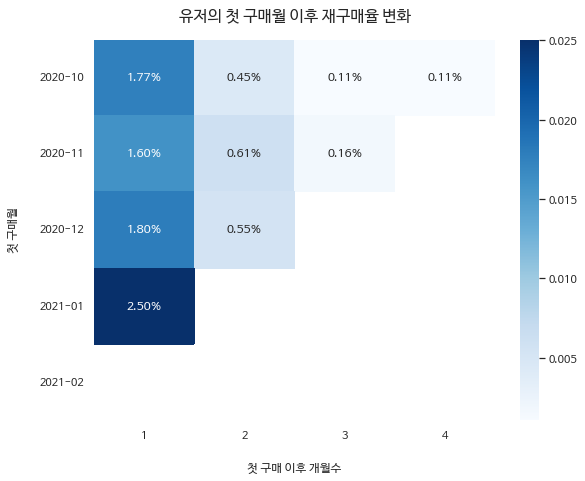

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
plt.rc('font', family="NanumBarunGothic")

g = sns.heatmap(reorder_rate.iloc[:, 1:], annot=True, fmt='.2%', cmap="Blues")

g.figure.set_size_inches(9,7)
g.set_title("유저의 첫 구매월 이후 재구매율 변화", pad=20, size=16)
g.set_xlabel("첫 구매 이후 개월수", labelpad = 20, size = 12)
g.set_ylabel("첫 구매월", labelpad = 20, size = 12)
sns.set_theme(style="whitegrid", palette="pastel")

재방문율로 cohort 그래프 그려보기

In [74]:
# 연도-월 형태의 필드를 생성
df['year_month'] = df['event_time'].dt.strftime('%Y-%m')
df.head()

# 방문은 어떤 이벤트라도 발생하면 방문으로 정의한다
visit_data = df[['event_time','user_id','user_session','year_month']]
visit_data.set_index('user_id',inplace=True)
visit_data.head()

,event_time,user_session,year_month
user_id,,,
1515915625520113390,2020-10-01 00:01:36+00:00,4X2NwIInsI,2020-10
1515915625521278799,2020-10-01 00:04:11+00:00,daM8ubpOfo,2020-10
1515915625521278938,2020-10-01 00:07:23+00:00,EdgYsorbdC,2020-10
1515915625520113390,2020-10-01 00:07:56+00:00,4X2NwIInsI,2020-10
1515915625521279091,2020-10-01 00:08:11+00:00,Et4GWStGMB,2020-10


In [75]:
# 유저 별 첫번쨰 방문월을 추출
first_visit = visit_data.groupby(visit_data.index)['year_month'].min()
first_visit.head()

# 기존 visit_data에 첫번쨰 방문월에 대한 정보를 추가
# to_frame 메서드를 사용하여 특정 열 이름을 가진 데이터 프레임으로 시리즈 변환
visit_data = visit_data.merge(
    first_visit.rename("first_visit_month").to_frame(),
    left_index=True,
    right_index=True
)
visit_data.head()

# index를 다시 해제
# inplace=True는 기존 데이터에 변화를 반영하겠다는 의미
visit_data.reset_index(inplace=True)
visit_data.head()

visit_grouped = visit_data.groupby(['first_visit_month','year_month'])

# 첫 방문월 별로 다음 달의 구매 건수 변화
visit_cohorts=visit_grouped['user_id'].nunique()
visit_cohorts.head(50)

first_visit_month  year_month
2020-10            2020-10       84216
                   2020-11        2387
                   2020-12         758
                   2021-01         504
                   2021-02         322
2020-11            2020-11       90213
                   2020-12        1879
                   2021-01         798
                   2021-02         557
2020-12            2020-12       69500
                   2021-01        1648
                   2021-02         716
2021-01            2021-01       78306
                   2021-02        2166
2021-02            2021-02       70845
Name: user_id, dtype: int64

In [76]:
visit_cohorts = visit_cohorts.reset_index()
visit_cohorts.head()

# 방문월이 9월인 경우는 제거 (한달의 길이가 불충분하기 때문)
visit_cohorts = visit_cohorts.loc[visit_cohorts.first_visit_month > '2020-09', :]

# 필드 user_id의 이름을 total_user로 변경합니다
visit_cohorts.rename({'user_id':'total_users'}, axis=1, inplace=True)
visit_cohorts.head()

# 각 첫 방문일 별로 월 수기 잘 분포되어 있는지 확인합니다.
each_period = visit_cohorts['first_visit_month'].value_counts().sort_index()
each_period

2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_visit_month, dtype: int64

In [77]:
# 코호트 분석을 위해, 첫 방문월과 방문월의 차이를 계산
# 기존 함수를 이용하기 위해 string을 datetime으로 바꾸고 to_period 함수를 사용

visit_cohorts['first_visit_month_dt'] = pd.to_datetime(visit_cohorts.first_visit_month, format="%Y-%m")
visit_cohorts["visit_month_dt"] = pd.to_datetime(visit_cohorts.year_month, format="%Y-%m")

visit_cohorts['month_diff'] = (
    visit_cohorts.visit_month_dt.dt.to_period('M').astype(int)
    - visit_cohorts.first_visit_month_dt.dt.to_period('M').astype(int)
)

visit_cohorts.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  if __name__ == '__main__':


,first_visit_month,year_month,total_users,first_visit_month_dt,visit_month_dt,month_diff
0,2020-10,2020-10,84216,2020-10-01,2020-10-01,0
1,2020-10,2020-11,2387,2020-10-01,2020-11-01,1
2,2020-10,2020-12,758,2020-10-01,2020-12-01,2
3,2020-10,2021-01,504,2020-10-01,2021-01-01,3
4,2020-10,2021-02,322,2020-10-01,2021-02-01,4


In [78]:
visit_cohorts = visit_cohorts[['first_visit_month','month_diff','total_users']]
visit_cohorts.set_index(['first_visit_month','month_diff'],inplace=True)
visit_cohorts.head()

total_users
first_visit_month month_diff             
2020-10           0                 84216
                  1                  2387
                  2                   758
                  3                   504
                  4                   322

In [79]:
visit_cohorts = visit_cohorts['total_users'].unstack(1)
visit_cohorts
# unstack : 왼쪽에서 오른쪽으로 (열방향)

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,84216.0,2387.0,758.0,504.0,322.0
2020-11,90213.0,1879.0,798.0,557.0,NaN
2020-12,69500.0,1648.0,716.0,NaN,NaN
2021-01,78306.0,2166.0,NaN,NaN,NaN
2021-02,70845.0,NaN,NaN,NaN,NaN


In [80]:
# 재방문율로 표한하기
revisit_rate = visit_cohorts.divide(visit_cohorts[0], axis = 0)
revisit_rate

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,1.0,0.028344,0.009001,0.005985,0.003824
2020-11,1.0,0.020828,0.008846,0.006174,NaN
2020-12,1.0,0.023712,0.010302,NaN,NaN
2021-01,1.0,0.027661,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


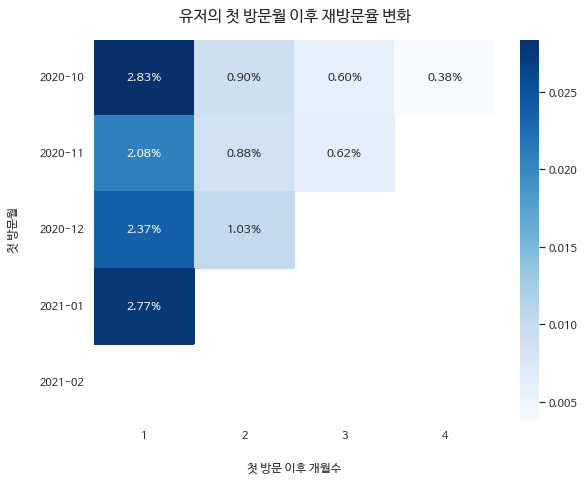

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
plt.rc('font', family = "NanumBarunGothic")

g = sns.heatmap(revisit_rate.iloc[:, 1:], annot=True, fmt='.2%', cmap = "Blues")

g.figure.set_size_inches(9,7)
g.set_title("유저의 첫 방문월 이후 재방문율 변화", pad=20, size=16)
g.set_xlabel("첫 방문 이후 개월수", labelpad=20, size=12)
g.set_ylabel("첫 방문월", labelpad=20, size=12)
sns.set_theme(style="whitegrid", palette="pastel")